In [19]:
#imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors


In [4]:
# Load the data
python = pd.read_csv("/Users/danae/desktop/python results.csv", delimiter=';')

# Set 'cell_id' column as index
python.set_index('cell_id', inplace=True)

# Drop 'cell_area' and 'nuc_area' columns
columns_to_drop = ['cell_area', 'nuc_area', 'nb_rna']
python_compare = python.drop(columns_to_drop, axis="columns")

# Define a function to map treatments based on cell ID
def map_treatment(cell_id):
    if 1 <= cell_id <= 100:
        return 'DMSO'
    elif 101 <= cell_id <= 200:
        return 'C70'
    elif 201 <= cell_id <= 300:
        return 'MRK'
    elif 301 <= cell_id <= 400:
        return 'JQ1'
    elif 401 <= cell_id <= 500:
        return 'FULV'
    elif 501 <= cell_id <= 600:
        return 'CPT'
    elif 601 <= cell_id <= 700:
        return 'TSA'
    elif 701 <= cell_id <= 800:
        return 'AZA'
    else:
        return None  

# Apply the function to create the 'treatment' column
python_compare['drug'] = python_compare.index.map(map_treatment)

# Display the DataFrame with the 'treatment' column added
python_compare

,nb_rna_in_nuc,nb_rna_out_nuc,nb_foci,nb_transcription_site,drug
cell_id,,,,,
1,398,320,3,11,DMSO
2,644,294,4,24,DMSO
3,365,318,3,6,DMSO
4,660,747,22,20,DMSO
5,185,162,1,2,DMSO
...,...,...,...,...,...
793,253,189,7,22,AZA
794,182,391,8,12,AZA
796,158,287,9,5,AZA


In [87]:
#nb_foci and nb_ts are crucial but not calculated by matlab script, so i will drop them for now in a new df
columns_to_drop = ['nb_foci', 'nb_transcription_site']
python_compare=python_compare.drop(columns_to_drop, axis="columns")
python_compare

,nb_rna_in_nuc,nb_rna_out_nuc,drug
cell_id,,,
1,398,320,DMSO
2,644,294,DMSO
3,365,318,DMSO
4,660,747,DMSO
5,185,162,DMSO
7,1016,392,DMSO
8,31,43,DMSO
9,897,1124,DMSO
10,847,764,DMSO


In [5]:
# Read the MATLAB results CSV file
matlab = pd.read_csv("/Users/danae/desktop/matlab results.csv", dtype={'Unnamed: 0': int},delimiter=";")

# Display the DataFrame
matlab
# Drop columns
columns_to_drop = ["gene", "replicate", "drugN", "total"]
matlab = matlab.drop(columns_to_drop, axis="columns")
matlab
# Rename the 'Unnamed: 0' column to 'cell_id'
matlab.rename(columns={'Unnamed: 0': 'cell_id'}, inplace=True)

# Display the modified DataFrame
matlab
# Set 'cell_id' column as the index
matlab.set_index('cell_id', inplace=True)

# Display the modified DataFrame
matlab

,drug,nucleus,cytoplasm
cell_id,,,
1,DMSO,119,74
2,DMSO,79,72
3,DMSO,307,214
4,DMSO,317,242
5,DMSO,424,244
...,...,...,...
796,AZA,92,73
797,AZA,193,171
798,AZA,94,37


In [6]:
# #create new merged dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Create new merged dataframe
merged_df = python_compare.merge(matlab, left_index=True, right_index=True)

# Display the resulting merged dataframe
merged_df
# Drop one of the 'drug' columns and rename the remaining one
merged_df.drop('drug_y', axis=1, inplace=True)
merged_df.rename(columns={'drug_x': 'drug'}, inplace=True)

# Display the resulting merged dataframe
merged_df


,nb_rna_in_nuc,nb_rna_out_nuc,nb_foci,nb_transcription_site,drug,nucleus,cytoplasm
cell_id,,,,,,,
1,398,320,3,11,DMSO,119,74
2,644,294,4,24,DMSO,79,72
3,365,318,3,6,DMSO,307,214
4,660,747,22,20,DMSO,317,242
5,185,162,1,2,DMSO,424,244
7,1016,392,7,24,DMSO,244,198
8,31,43,3,5,DMSO,23,10
9,897,1124,23,27,DMSO,52,19
10,847,764,17,19,DMSO,77,28


In [7]:
# Compare the counts between scripts
if (merged_df['nb_rna_in_nuc'] > merged_df['nucleus']).sum():
    print("Overall trend: nb_rna_in_nuc tends to be higher than nucleus.")
elif (merged_df['nb_rna_in_nuc'] < merged_df['nucleus']).sum():
    print("Overall trend: nb_rna_in_nuc tends to be lower than nucleus.")
if (merged_df['nb_rna_out_nuc'] > merged_df['cytoplasm']).sum():
    print("Overall trend: nb_rna_out_nuc tends to be higher than cytoplasm.")
elif (merged_df['nb_rna_out_nuc'] < merged_df['cytoplasm']).sum():
    print("Overall trend: nb_rna_out_nuc tends to be higher than cytoplasm.")    
#else:
    #print("Overall trend: Equal numbers of occurrences where nb_rna_in_nuc is higher than nucleus and nb_rna_out_nuc is higher than cytoplasm.")
if (merged_df['nb_rna_in_nuc'] > merged_df['nb_rna_out_nuc']).sum():
    print("Overall trend: python nucleus higher than cytoplasm.")
elif (merged_df['nb_rna_in_nuc'] < merged_df['nb_rna_out_nuc']).sum():
    print("Overall trend: python nucleus lower than cytoplasm.")
if (merged_df['nucleus'] > merged_df['cytoplasm']).sum():
    print("Overall trend: matlab nucleus higher than cytoplasm.")
elif (merged_df['nucleus'] < merged_df['cytoplasm']).sum():
    print("Overall trend: matlab nucleus tends to be lower than nucleus.")


Overall trend: nb_rna_in_nuc tends to be higher than nucleus.
Overall trend: nb_rna_out_nuc tends to be higher than cytoplasm.
Overall trend: python nucleus higher than cytoplasm.
Overall trend: matlab nucleus higher than cytoplasm.


In [8]:
# Calculate absolute differences between corresponding pairs
merged_df['cytoplasm_out_nuc_diff'] = abs(merged_df['nb_rna_out_nuc'] - merged_df['cytoplasm'])
merged_df['nucleus_in_nuc_diff'] = abs(merged_df['nb_rna_in_nuc'] - merged_df['nucleus'])

# Set a threshold for dissimilarity
# Set a threshold for dissimilarity
threshold_out_nuc = merged_df['cytoplasm'] * 2
threshold_in_nuc = merged_df['nucleus'] * 2

# Identify pairs with dissimilar values
dissimilar_pairs = merged_df[(merged_df['nb_rna_out_nuc'] > threshold_out_nuc) & (merged_df['nb_rna_in_nuc'] > threshold_in_nuc)]

# Print or analyze the dissimilar pairs as needed
# print("Pairs with dissimilar values:")
# print(dissimilar_pairs)
print("Number of dissimilar pairs:", dissimilar_pairs.shape[0])

Number of dissimilar pairs: 322


In [9]:
drugs = merged_df['drug'].unique()

for drug in drugs:
    # Filter data for the specific drug
    drug_data = merged_df[merged_df['drug'] == drug]
    
    # Perform t-test for nucleus (Python) vs nucleus (Matlab)
    t_stat_nucleus, p_val_nucleus = ttest_ind(drug_data['nucleus'], drug_data['nb_rna_in_nuc'], nan_policy='omit')
    
    # Perform t-test for cytoplasm (Python) vs cytoplasm (Matlab)
    t_stat_cytoplasm, p_val_cytoplasm = ttest_ind(drug_data['cytoplasm'], drug_data['nb_rna_out_nuc'], nan_policy='omit')
    
    # Print results
    print(f"Drug: {drug}")
    print(f"Nucleus (Python) vs Nucleus (Matlab) - T-statistic: {t_stat_nucleus}, P-value: {p_val_nucleus}")
    print(f"Cytoplasm (Python) vs Cytoplasm (Matlab) - T-statistic: {t_stat_cytoplasm}, P-value: {p_val_cytoplasm}")
    print()

Drug: DMSO
Nucleus (Python) vs Nucleus (Matlab) - T-statistic: -7.021549296159401, P-value: 8.006649499440803e-11
Cytoplasm (Python) vs Cytoplasm (Matlab) - T-statistic: -2.5125560768307804, P-value: 0.013088297316537061

Drug: C70
Nucleus (Python) vs Nucleus (Matlab) - T-statistic: -3.7520757823571578, P-value: 0.00024686433892203715
Cytoplasm (Python) vs Cytoplasm (Matlab) - T-statistic: -3.3102665210315565, P-value: 0.0011578420685814338

Drug: MRK
Nucleus (Python) vs Nucleus (Matlab) - T-statistic: -4.8066904433058815, P-value: 3.817182272842629e-06
Cytoplasm (Python) vs Cytoplasm (Matlab) - T-statistic: -5.851812927688017, P-value: 3.144643408777046e-08

Drug: JQ1
Nucleus (Python) vs Nucleus (Matlab) - T-statistic: -3.1487927008631362, P-value: 0.001993611078823116
Cytoplasm (Python) vs Cytoplasm (Matlab) - T-statistic: -2.099901393497179, P-value: 0.03748144741577758

Drug: FULV
Nucleus (Python) vs Nucleus (Matlab) - T-statistic: -4.889238224116265, P-value: 2.3960442154702994e-0

In [10]:
# Data
data = {
    'Drug': ['DMSO', 'C70', 'MRK', 'JQ1', 'FULV', 'CPT', 'TSA', 'AZA'],
    'Nucleus (Python) vs Nucleus (Matlab) - T-statistic': [7.021549296159401, 3.7520757823571578, 4.8066904433058815, 3.1487927008631362, 4.889238224116267, 4.84010348881834, 3.301270009063958, 4.198288427247853],
    'Nucleus (Python) vs Nucleus (Matlab) - P-value': [8.006649499440804e-11, 0.00024686433892203715, 3.817182272842629e-06, 0.001993611078823116, 2.3960442154702773e-06, 3.0946416127232236e-06, 0.001175633226290828, 4.6224479619422963e-05],
    'Cytoplasm (Python) vs Cytoplasm (Matlab) - T-statistic': [2.5125560768307804, 3.3102665210315565, 5.851812927688017, 2.099901393497179, 4.123779961953202, 4.839398585757521, 3.0278755633169907, 8.391748539425853],
    'Cytoplasm (Python) vs Cytoplasm (Matlab) - P-value': [0.013088297316537061, 0.0011578420685814336, 3.144643408777046e-08, 0.03748144741577758, 5.9089582919188006e-05, 3.104195641391318e-06, 0.002851382748796734, 3.527764285800021e-14]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df


,Drug,Nucleus (Python) vs Nucleus (Matlab) - T-statistic,Nucleus (Python) vs Nucleus (Matlab) - P-value,Cytoplasm (Python) vs Cytoplasm (Matlab) - T-statistic,Cytoplasm (Python) vs Cytoplasm (Matlab) - P-value
0,DMSO,7.021549,8.006649e-11,2.512556,1.308830e-02
1,C70,3.752076,2.468643e-04,3.310267,1.157842e-03
2,MRK,4.806690,3.817182e-06,5.851813,3.144643e-08
3,JQ1,3.148793,1.993611e-03,2.099901,3.748145e-02
4,FULV,4.889238,2.396044e-06,4.123780,5.908958e-05
5,CPT,4.840103,3.094642e-06,4.839399,3.104196e-06
6,TSA,3.301270,1.175633e-03,3.027876,2.851383e-03
7,AZA,4.198288,4.622448e-05,8.391749,3.527764e-14


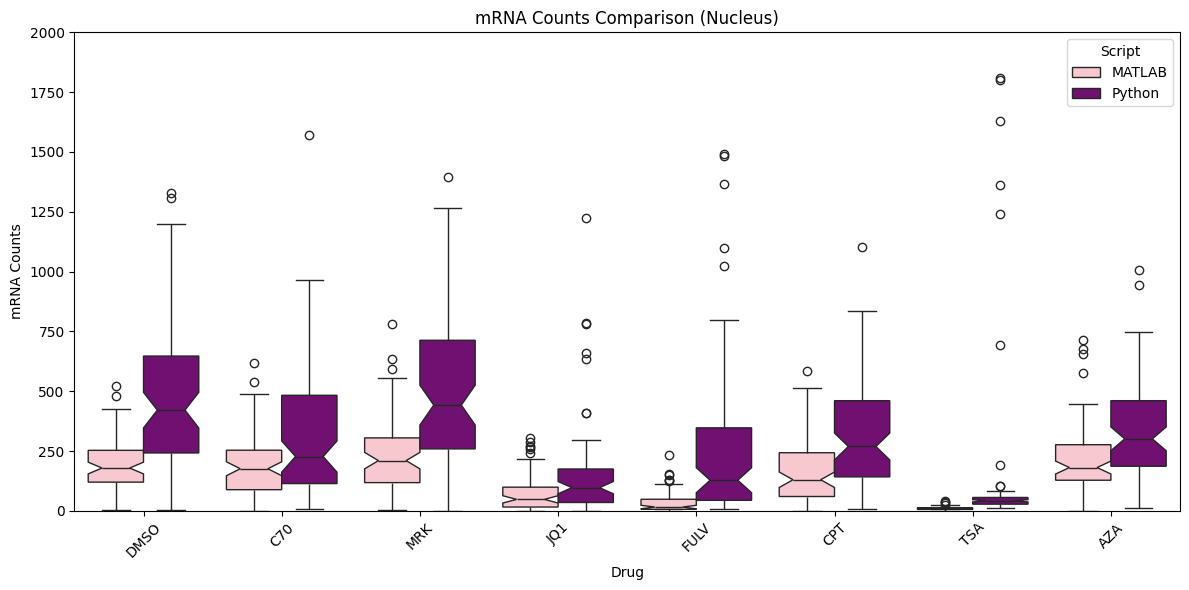

Nucleus Statistical Results:
   Drug  T-statistic       P-value
0  DMSO     7.021549  8.006649e-11
1   C70     3.752076  2.468643e-04
2   MRK     4.806690  3.817182e-06
3   JQ1     3.148793  1.993611e-03
4  FULV     4.889238  2.396044e-06
5   CPT     4.840103  3.094642e-06
6   TSA     3.301270  1.175633e-03
7   AZA     4.198288  4.622448e-05


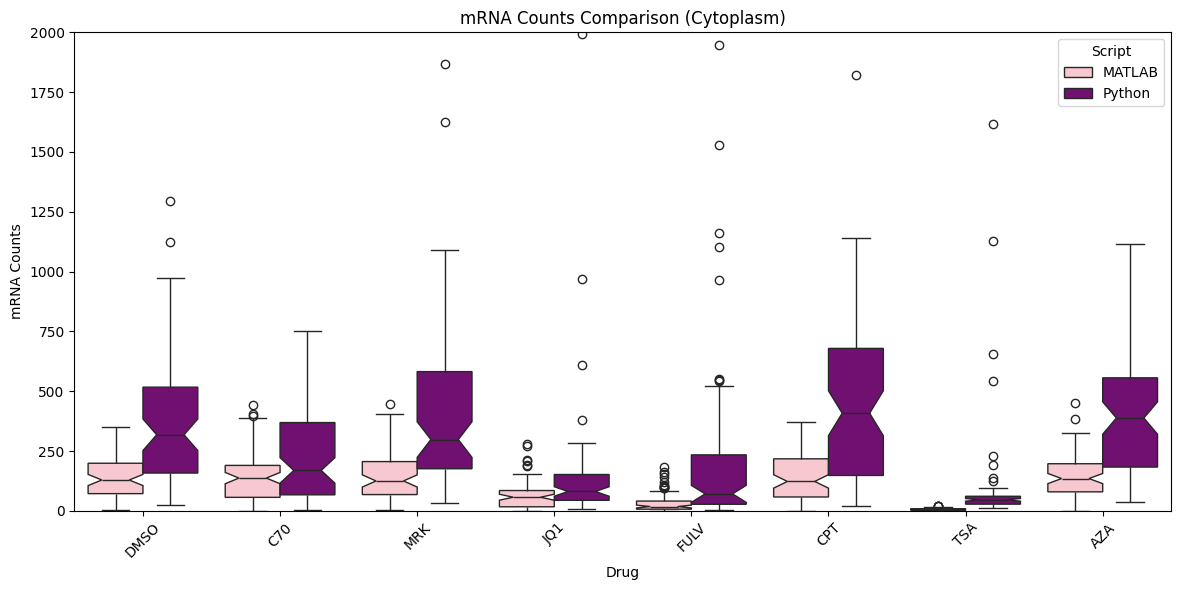

Cytoplasm Statistical Results:
   Drug  T-statistic       P-value
0  DMSO     2.512556  1.308830e-02
1   C70     3.310267  1.157842e-03
2   MRK     5.851813  3.144643e-08
3   JQ1     2.099901  3.748145e-02
4  FULV     4.123780  5.908958e-05
5   CPT     4.839399  3.104196e-06
6   TSA     3.027876  2.851383e-03
7   AZA     8.391749  3.527764e-14


In [12]:
#nucleus counts matlab vs python, cytoplasm counts matlab vs python
# Extract unique drugs
drugs = merged_df['drug'].unique()

# Create a list to store statistical results
results_nucleus = []
results_cytoplasm = []

# Create a DataFrame to store data for plotting
plot_data_nucleus = pd.DataFrame(columns=['Drug', 'mRNA Counts', 'Script'])
plot_data_cytoplasm = pd.DataFrame(columns=['Drug', 'mRNA Counts', 'Script'])

# Iterate over each drug
for drug in drugs:
    # Filter data for the specific drug
    drug_data = merged_df[merged_df['drug'] == drug]
    
    # Perform t-test for nucleus
    t_stat_nucleus, p_val_nucleus = ttest_ind(drug_data['nb_rna_in_nuc'], drug_data['nucleus'], nan_policy='omit')
    # Append statistical results for nucleus
    results_nucleus.append({
        'Drug': drug,
        'T-statistic': t_stat_nucleus,
        'P-value': p_val_nucleus
    })
    # Append data for plotting for nucleus
    plot_data_nucleus = pd.concat([plot_data_nucleus, drug_data[['drug', 'nucleus']].rename(columns={'nucleus': 'mRNA Counts', 'drug': 'Drug'}).assign(Script='MATLAB')])
    plot_data_nucleus = pd.concat([plot_data_nucleus, drug_data[['drug', 'nb_rna_in_nuc']].rename(columns={'nb_rna_in_nuc': 'mRNA Counts', 'drug': 'Drug'}).assign(Script='Python')])
    
    # Perform t-test for cytoplasm
    t_stat_cytoplasm, p_val_cytoplasm = ttest_ind(drug_data['nb_rna_out_nuc'], drug_data['cytoplasm'], nan_policy='omit')
    # Append statistical results for cytoplasm
    results_cytoplasm.append({
        'Drug': drug,
        'T-statistic': t_stat_cytoplasm,
        'P-value': p_val_cytoplasm
    })
    # Append data for plotting for cytoplasm
    plot_data_cytoplasm = pd.concat([plot_data_cytoplasm, drug_data[['drug', 'cytoplasm']].rename(columns={'cytoplasm': 'mRNA Counts', 'drug': 'Drug'}).assign(Script='MATLAB')])
    plot_data_cytoplasm = pd.concat([plot_data_cytoplasm, drug_data[['drug', 'nb_rna_out_nuc']].rename(columns={'nb_rna_out_nuc': 'mRNA Counts', 'drug': 'Drug'}).assign(Script='Python')])


#Plotting for nucleus
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_data_nucleus, x='Drug', y='mRNA Counts', hue='Script',palette=['pink', 'purple'],notch=True)
plt.title('mRNA Counts Comparison (Nucleus)')
plt.xlabel('Drug')
plt.ylabel('mRNA Counts')
plt.xticks(rotation=45)
plt.legend(title='Script', loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.ylim(0, 2000)
plt.show()
# Display statistical results for nucleus
results_df_nucleus = pd.DataFrame(results_nucleus)
print("Nucleus Statistical Results:")
print(results_df_nucleus)

# Plotting for cytoplasm
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_data_cytoplasm, x='Drug', y='mRNA Counts', hue='Script', palette=['pink', 'purple'],notch=True)
plt.title('mRNA Counts Comparison (Cytoplasm)')
plt.xlabel('Drug')
plt.ylabel('mRNA Counts')
plt.xticks(rotation=45)
plt.legend(title='Script', loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.ylim(0, 2000)
plt.show()
# Display statistical results for cytoplasm
results_df_cytoplasm = pd.DataFrame(results_cytoplasm)
print("Cytoplasm Statistical Results:")
print(results_df_cytoplasm)


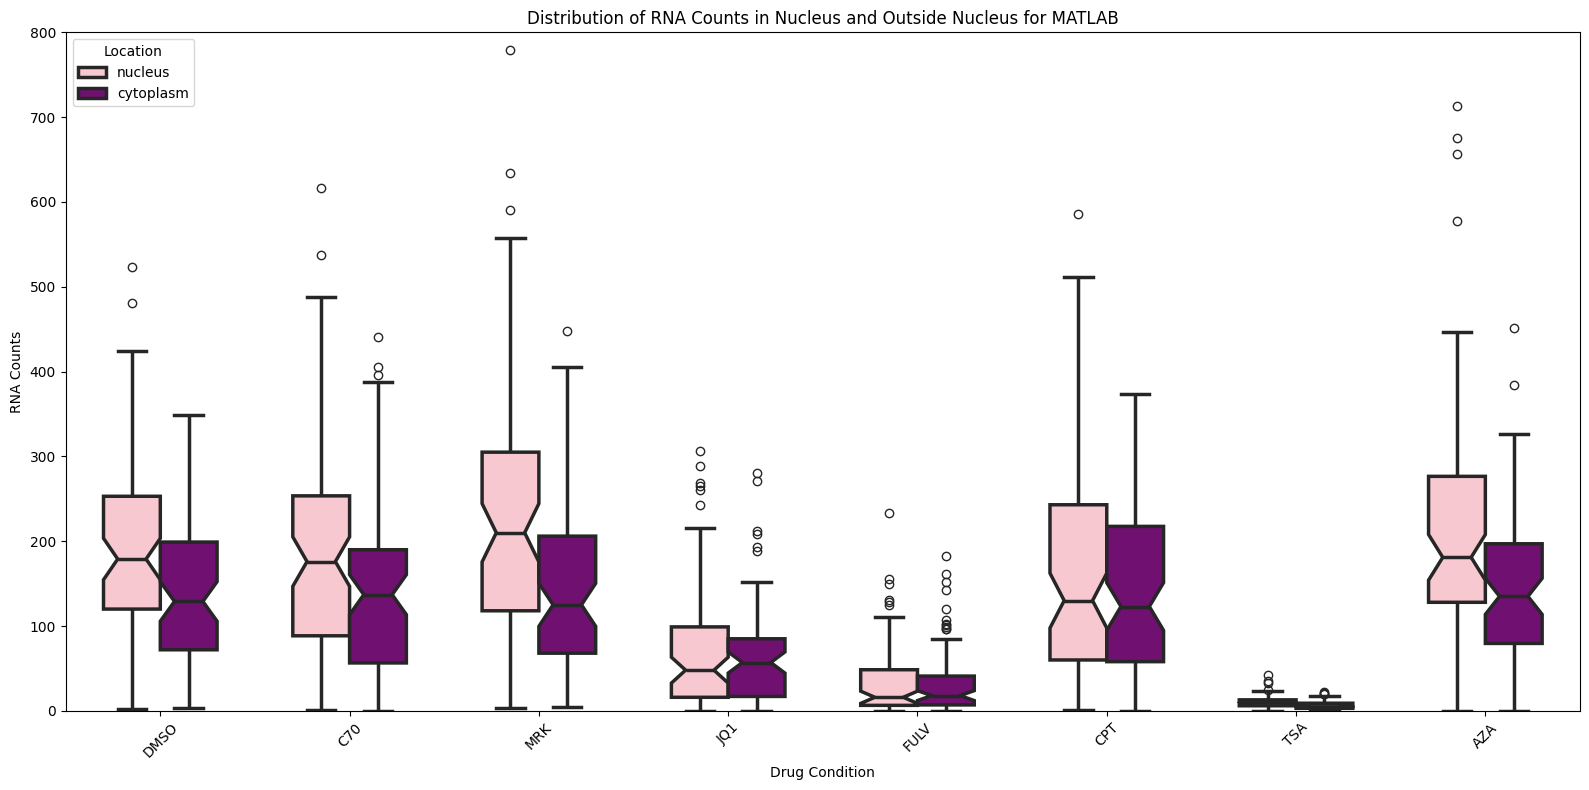

In [13]:
#matlab cytoplasm vs nucleus
mean_counts = merged_df.groupby('drug')[['nucleus', 'cytoplasm']].mean()
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(16, 8))

# Melt the DataFrame to combine nucleus and cytoplasm into one column
merged_melted = merged_df.melt(id_vars=['drug'], value_vars=['nucleus', 'cytoplasm'], var_name='Location', value_name='RNA Counts')

# Combine both boxplots into one graph
sns.boxplot(data=merged_melted, x='drug', y='RNA Counts', hue='Location', palette=['pink', 'purple'], width=0.6, linewidth=2.5,notch=True)

# Set title and labels
plt.title('Distribution of RNA Counts in Nucleus and Outside Nucleus for MATLAB')
plt.xlabel('Drug Condition')
plt.ylabel('RNA Counts')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

# Set the y-axis limits
plt.ylim(0, 800)

# Show plot
plt.show()


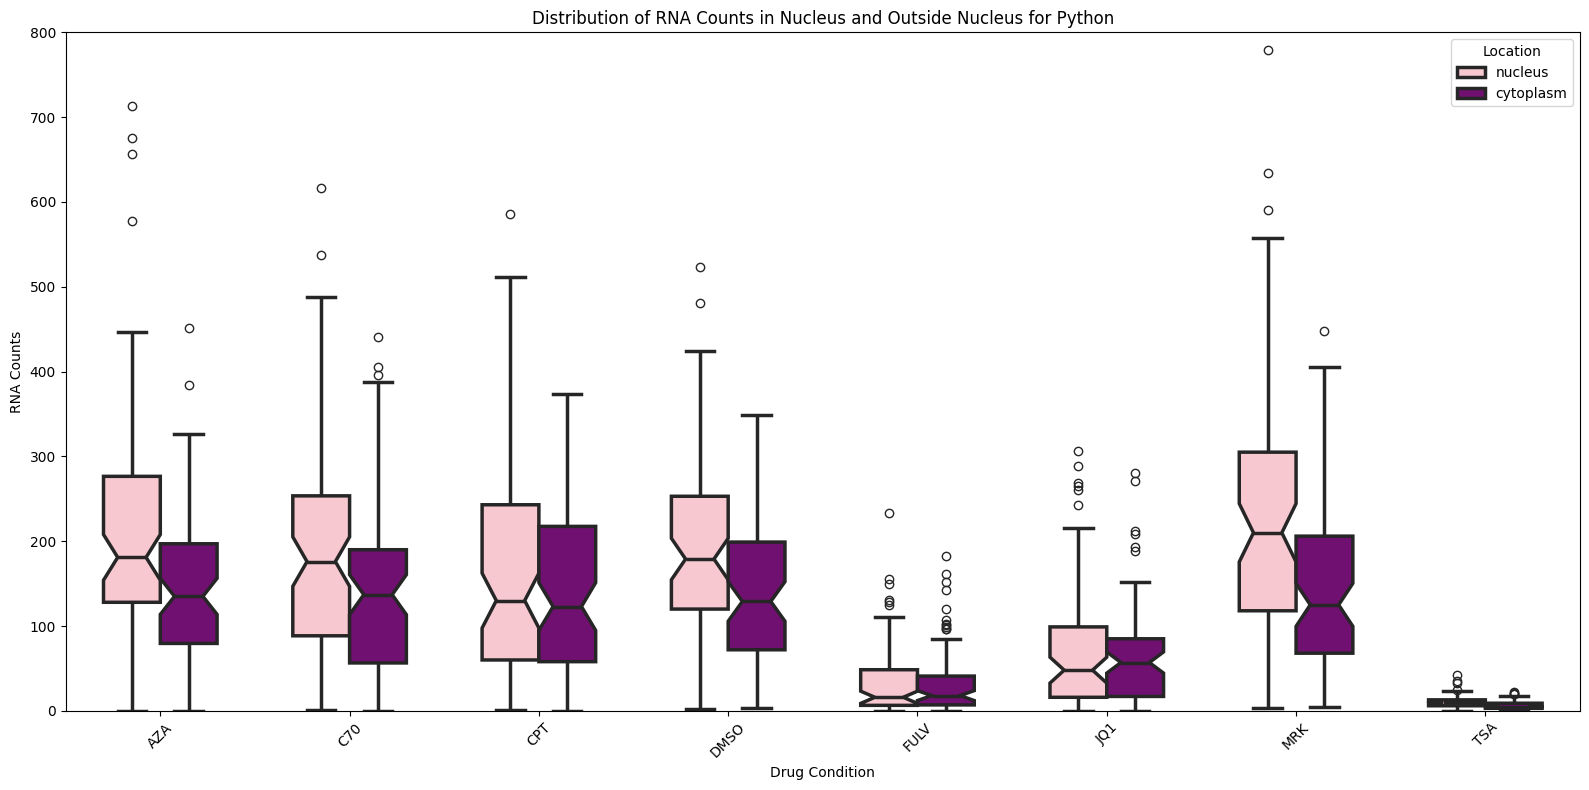

In [14]:
#python cytoplasm vs nucleus
# Calculate mean counts for each script (drug) per condition
mean_counts = merged_df.groupby('drug')[['nb_rna_in_nuc', 'nb_rna_out_nuc']].mean()

# Sort the mean counts DataFrame by drug name in ascending order
mean_counts_sorted = mean_counts.sort_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Melt the DataFrame to combine nucleus and cytoplasm into one column
merged_melted = merged_df.melt(id_vars=['drug'], value_vars=['nucleus', 'cytoplasm'], var_name='Location', value_name='RNA Counts')

# Combine both boxplots into one graph
sns.boxplot(data=merged_melted, x='drug', y='RNA Counts', hue='Location', palette=['pink', 'purple'], order=mean_counts_sorted.index, width=0.6, linewidth=2.5, notch=True)

# Set title and labels
plt.title('Distribution of RNA Counts in Nucleus and Outside Nucleus for Python')
plt.xlabel('Drug Condition')
plt.ylabel('RNA Counts')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

# Set the y-axis limits
plt.ylim(0, 800)

# Show plot
plt.show()

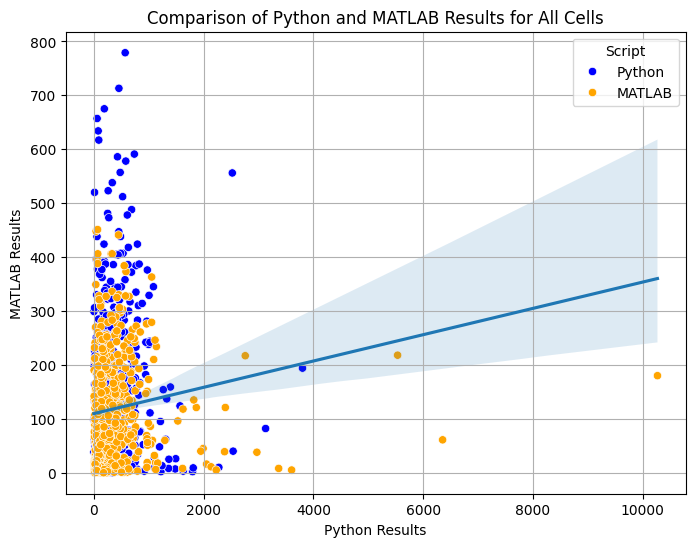

In [15]:
#scatterplot comparing python vs matlab results for all cells (no distinction between cytoplasm and nuclear counts) 
# Merge Python and MATLAB counts into one dataframe
merged_counts = pd.DataFrame({
    'Python': merged_df['nb_rna_in_nuc'].values.tolist() + merged_df['nb_rna_out_nuc'].values.tolist(),
    'MATLAB': merged_df['nucleus'].values.tolist() + merged_df['cytoplasm'].values.tolist(),
    'Script': ['Python'] * len(merged_df) + ['MATLAB'] * len(merged_df)  # Add script information
})

# Create a scatterplot with trendline for all cells
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_counts, x='Python', y='MATLAB', hue='Script', palette=['blue', 'orange'])
sns.regplot(data=merged_counts, x='Python', y='MATLAB', scatter=False)

# Set labels and title
plt.xlabel('Python Results')
plt.ylabel('MATLAB Results')
plt.title('Comparison of Python and MATLAB Results for All Cells')

# Show plot
plt.grid(True)
plt.legend(title='Script')
plt.show()


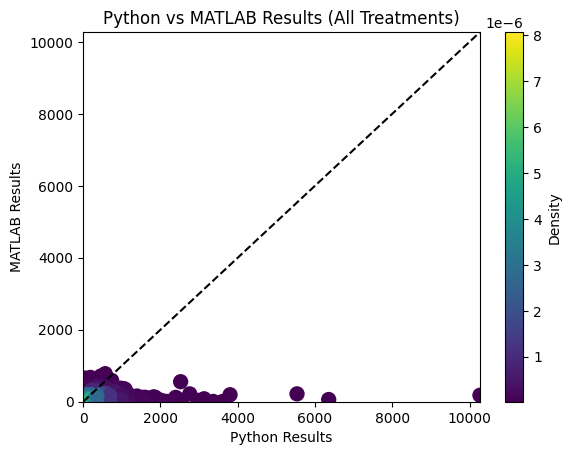

In [22]:
#scatterplot colour density all treatments with same value range in x,y axis

# Create a merged dataframe including all Python and MATLAB results per treatment
merged_counts = pd.DataFrame({
    'Python': merged_df['nb_rna_in_nuc'].values.tolist() + merged_df['nb_rna_out_nuc'].values.tolist(),
    'MATLAB': merged_df['nucleus'].values.tolist() + merged_df['cytoplasm'].values.tolist(),
    'Drug': merged_df['drug'].values.tolist() * 2  # Repeat drug information for both Python and MATLAB results
})

# Calculate the point density
xy = np.vstack([merged_counts['Python'], merged_counts['MATLAB']])
z = gaussian_kde(xy)(xy)

# Plot the scatterplot with point density
fig, ax = plt.subplots()
scatter = ax.scatter(merged_counts['Python'], merged_counts['MATLAB'], c=z, s=100)

# Add a colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Density')

# Add a 45-degree line through zero
max_value = max(np.max(merged_counts['Python']), np.max(merged_counts['MATLAB']))
ax.plot([0, max_value], [0, max_value], linestyle='--', color='black')

# Set the same axis limits for x and y
ax.set_xlim(0, max_value)
ax.set_ylim(0, max_value)

# Set labels and title
plt.xlabel('Python Results')
plt.ylabel('MATLAB Results')
plt.title('Python vs MATLAB Results (All Treatments)')

plt.show()



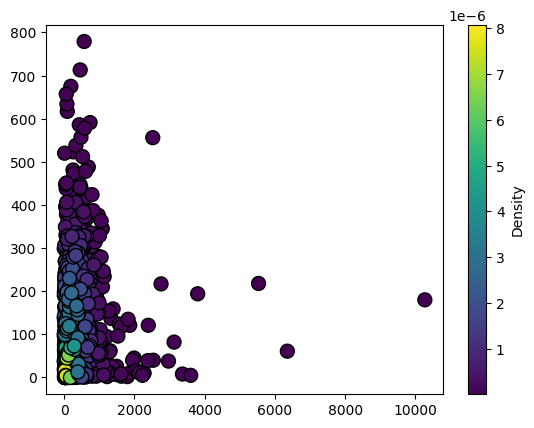

In [24]:
#similar graph but different axis range
x = merged_counts['Python']
y = merged_counts['MATLAB']

# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Plot the scatterplot with point density
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100, edgecolor='black')

# Add a density legend
cbar = fig.colorbar(scatter)
cbar.set_label('Density')

plt.show()


In [26]:
merged_counts

,Python,MATLAB,Drug
0,398,119,DMSO
1,644,79,DMSO
2,365,307,DMSO
3,660,317,DMSO
4,185,424,DMSO
5,1016,244,DMSO
6,31,23,DMSO
7,897,52,DMSO
8,847,77,DMSO
9,123,153,DMSO


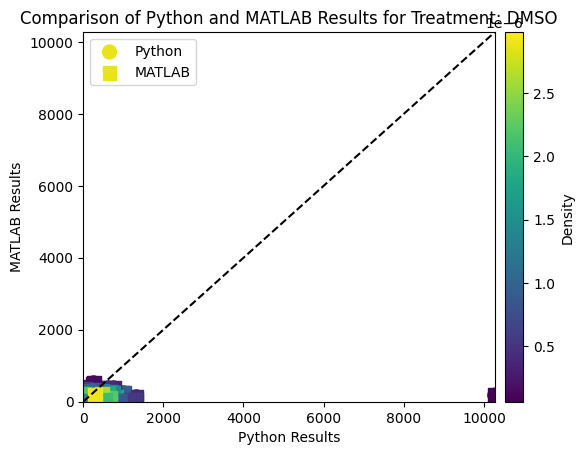

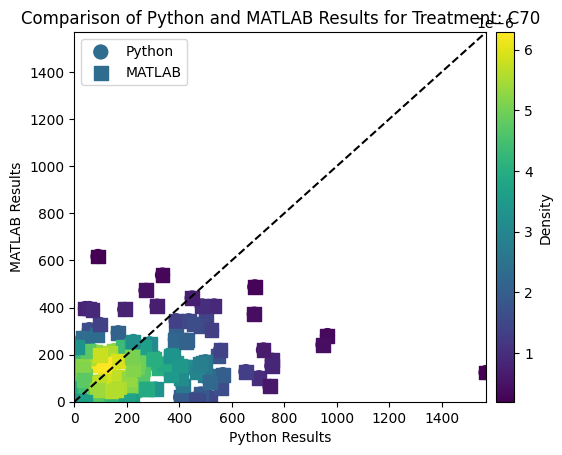

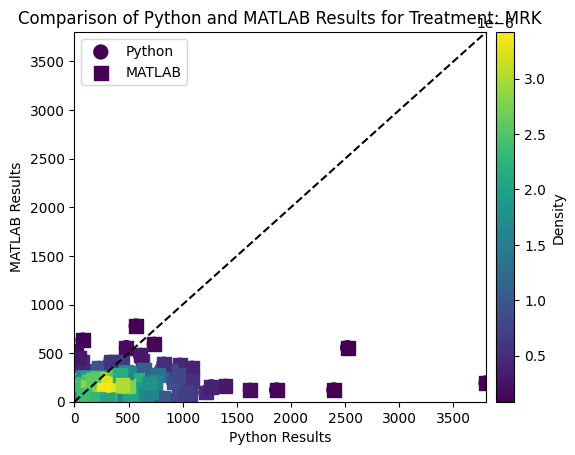

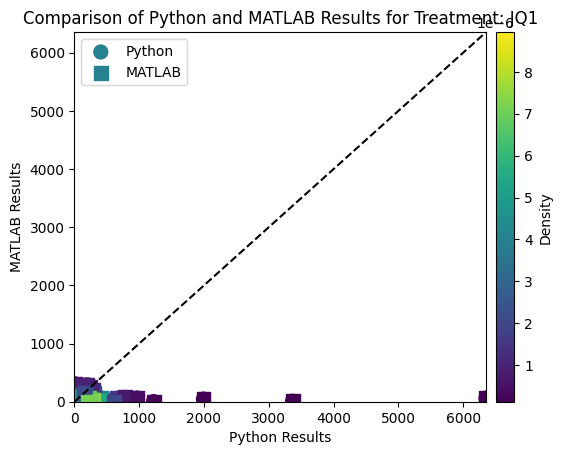

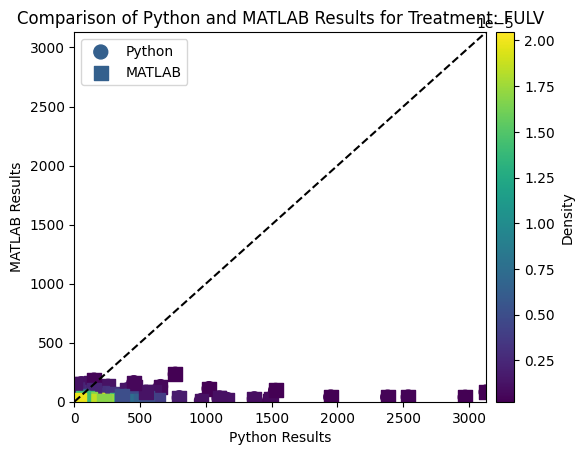

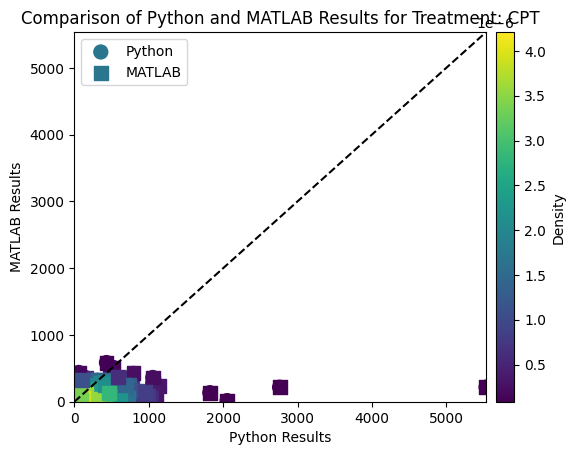

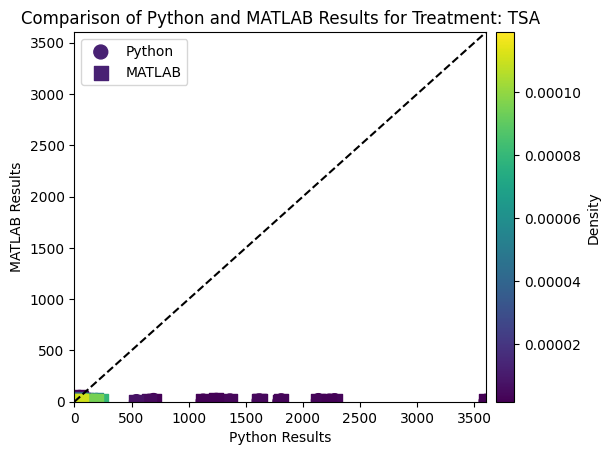

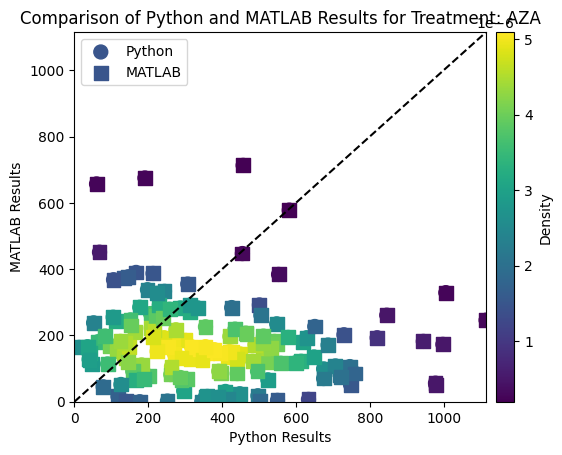

In [28]:
# List of unique treatment values
treatments = merged_counts['Drug'].unique()

# Define marker styles for Python and MATLAB
marker_styles = ['o', 's']  # 'o' for Python, 's' for MATLAB

# Iterate over each treatment
for treatment in treatments:
    # Filter the merged_counts dataframe for the current treatment
    treatment_df = merged_counts[merged_counts['Drug'] == treatment]
    
    # Calculate the point density
    xy = np.vstack([treatment_df['Python'], treatment_df['MATLAB']])
    z = gaussian_kde(xy)(xy)

    # Plot the scatterplot with point density
    fig, ax = plt.subplots()
    for i, script in enumerate(['Python', 'MATLAB']):
        script_df = treatment_df  # No need to filter by script since we're distinguishing with markers
        scatter = ax.scatter(script_df['Python'], script_df['MATLAB'], c=z, s=100, marker=marker_styles[i], label=script)

    # Add a colorbar for density
    cbar = fig.colorbar(scatter, ax=ax, pad=0.02)
    cbar.set_label('Density')

    # Add a 45-degree line through zero
    max_value = max(np.max(treatment_df['Python']), np.max(treatment_df['MATLAB']))
    ax.plot([0, max_value], [0, max_value], linestyle='--', color='black')

    # Set the same axis limits for x and y
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, max_value)

    # Set labels and title
    plt.xlabel('Python Results')
    plt.ylabel('MATLAB Results')
    plt.title(f'Comparison of Python and MATLAB Results for Treatment: {treatment}')
    
    # Add legend
    plt.legend()

    plt.show()



In [29]:
# Summary statistics for MATLAB and Python data
matlab_summary = matlab.describe()
python_summary = python_compare.describe()

# Display summary statistics
print("Summary statistics for MATLAB data:")
print(matlab_summary)
print("\nSummary statistics for Python data:")
print(python_summary)

Summary statistics for MATLAB data:
          nucleus   cytoplasm
count  800.000000  800.000000
mean   138.965000  101.527500
std    139.263578   96.958318
min      0.000000    0.000000
25%     16.750000   15.000000
50%    102.000000   74.500000
75%    217.000000  160.000000
max    779.000000  475.000000

Summary statistics for Python data:
       nb_rna_in_nuc  nb_rna_out_nuc     nb_foci  nb_transcription_site
count     620.000000      620.000000  620.000000             620.000000
mean      324.117742      348.779032   13.445161              17.609677
std       386.646834      662.933843   33.564471              31.570613
min         0.000000        5.000000    0.000000               0.000000
25%        55.000000       57.750000    2.000000               4.000000
50%       206.000000      171.000000    4.000000               8.000000
75%       460.500000      420.500000   11.000000              17.250000
max      3802.000000    10270.000000  394.000000             305.000000
